In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding="latin-1")

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


**Exploratory Data Analysis (EDA)**

In [3]:
attribute_stats = df[['bpm', 'danceability_%', 'valence_%', 'energy_%']].describe()
print(attribute_stats)


              bpm  danceability_%   valence_%    energy_%
count  953.000000       953.00000  953.000000  953.000000
mean   122.540399        66.96957   51.431270   64.279119
std     28.057802        14.63061   23.480632   16.550526
min     65.000000        23.00000    4.000000    9.000000
25%    100.000000        57.00000   32.000000   53.000000
50%    121.000000        69.00000   51.000000   66.000000
75%    140.000000        78.00000   70.000000   77.000000
max    206.000000        96.00000   97.000000   97.000000


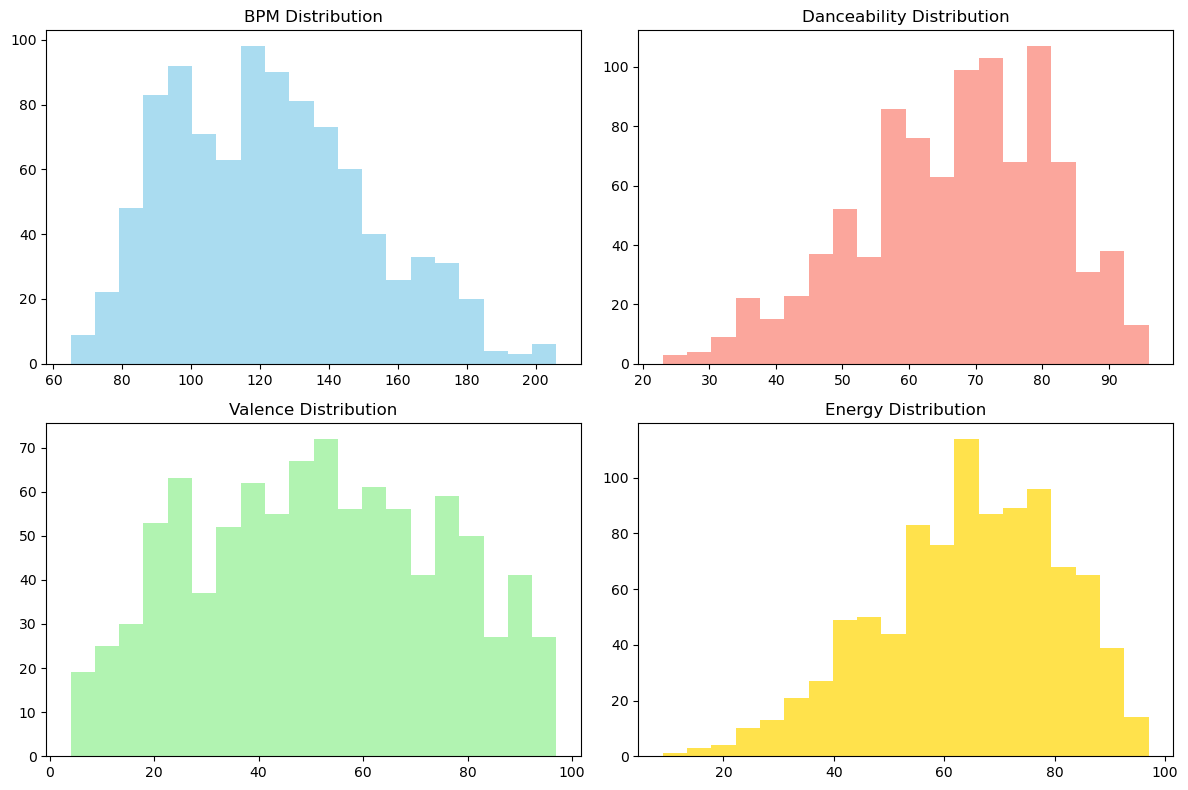

In [4]:
# Create histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['bpm'], bins=20, color='skyblue', alpha=0.7)
plt.title('BPM Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['danceability_%'], bins=20, color='salmon', alpha=0.7)
plt.title('Danceability Distribution')

plt.subplot(2, 2, 3)
plt.hist(df['valence_%'], bins=20, color='lightgreen', alpha=0.7)
plt.title('Valence Distribution')

plt.subplot(2, 2, 4)
plt.hist(df['energy_%'], bins=20, color='gold', alpha=0.7)
plt.title('Energy Distribution')

plt.tight_layout()
plt.show()

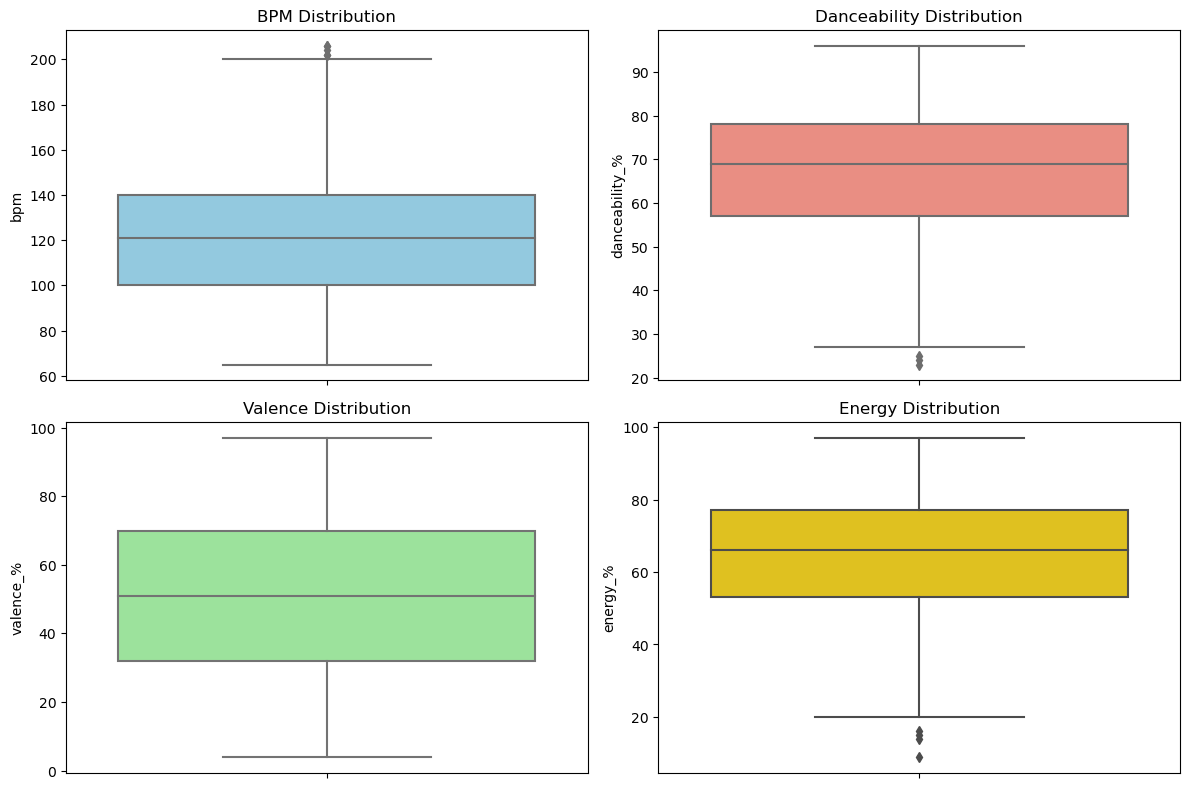

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, y='bpm', color='skyblue')
plt.title('BPM Distribution')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='danceability_%', color='salmon')
plt.title('Danceability Distribution')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='valence_%', color='lightgreen')
plt.title('Valence Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='energy_%', color='gold')
plt.title('Energy Distribution')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


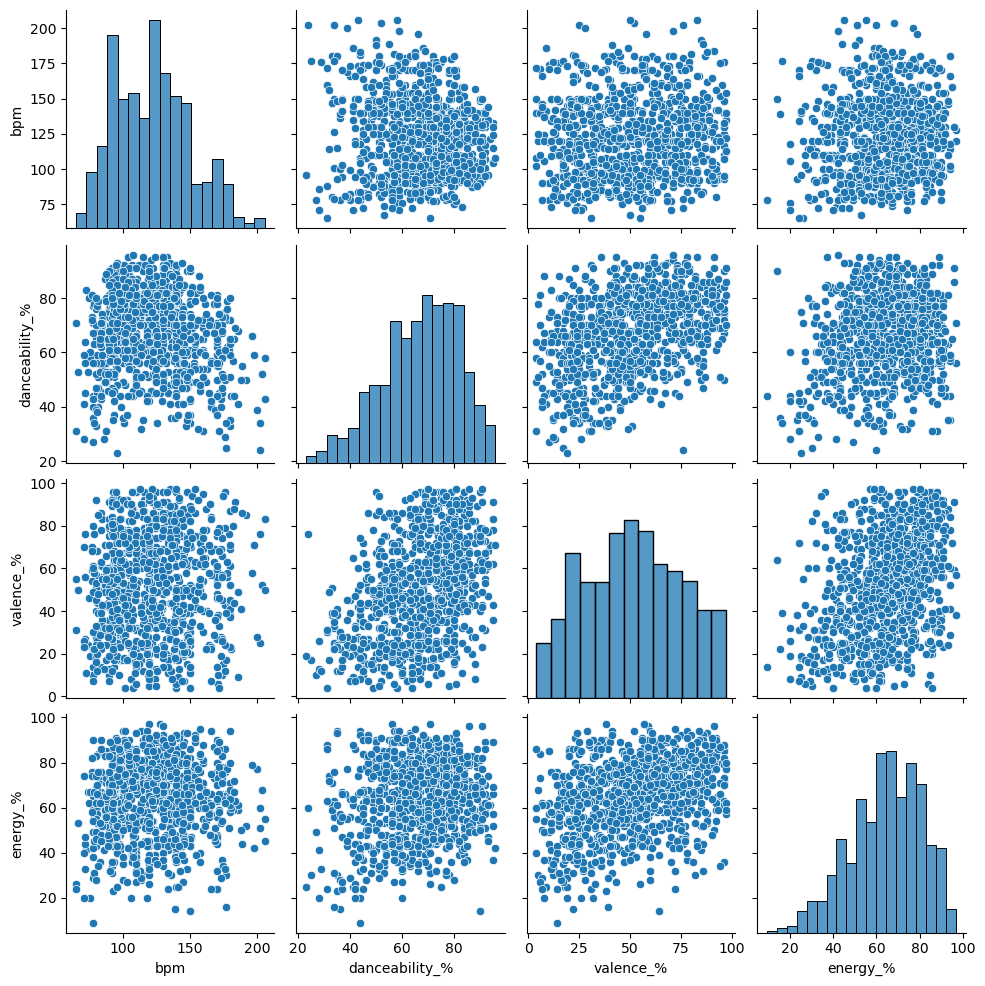

In [6]:
sns.pairplot(df[['bpm', 'danceability_%', 'valence_%', 'energy_%']])
plt.show()

**Playlist and Chart Metrics**

1. Relationship Between Playlist Inclusions and Song Attributes or Streams:

/tmp/ipykernel_20/405266247.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = playlist_metrics.corr()


Correlation Matrix:
                      in_spotify_playlists  in_apple_playlists   streams  \
in_spotify_playlists              1.000000            0.708277  0.789822   
in_apple_playlists                0.708277            1.000000  0.772063   
streams                           0.789822            0.772063  1.000000   
bpm                              -0.019598            0.023725 -0.002438   
danceability_%                   -0.106534           -0.025326 -0.105457   
valence_%                        -0.021883            0.057075 -0.040831   
energy_%                          0.033808            0.052615 -0.026051   

                           bpm  danceability_%  valence_%  energy_%  
in_spotify_playlists -0.019598       -0.106534  -0.021883  0.033808  
in_apple_playlists    0.023725       -0.025326   0.057075  0.052615  
streams              -0.002438       -0.105457  -0.040831 -0.026051  
bpm                   1.000000       -0.147095   0.041195  0.025794  
danceability_%       

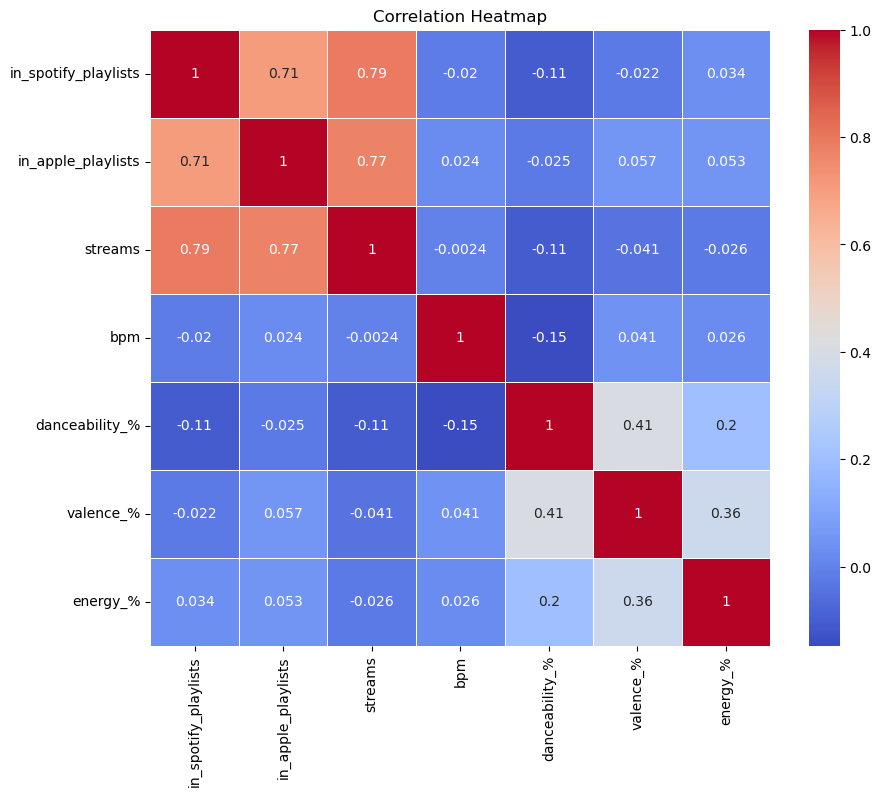

In [7]:
# Investigate the relationship between playlist inclusions and song attributes or streams
playlist_metrics = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']]

# Calculate correlations between playlist metrics and song attributes or streams
correlations = playlist_metrics.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlations)


plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


2. Correlation Between Chart Metrics and Song Characteristics:

/tmp/ipykernel_20/2888907736.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chart_correlations = chart_metrics.corr()


Correlation Matrix for Chart Metrics:
                   in_spotify_charts  in_apple_charts  in_deezer_charts  \
in_spotify_charts           1.000000         0.552232          0.600205   
in_apple_charts             0.552232         1.000000          0.383668   
in_deezer_charts            0.600205         0.383668          1.000000   
streams                     0.245821         0.320234          0.228598   
bpm                         0.034713         0.030962          0.028036   
danceability_%              0.030071        -0.025204          0.070913   
valence_%                   0.035531         0.047733          0.076196   
energy_%                    0.081920         0.104828          0.094627   

                    streams       bpm  danceability_%  valence_%  energy_%  
in_spotify_charts  0.245821  0.034713        0.030071   0.035531  0.081920  
in_apple_charts    0.320234  0.030962       -0.025204   0.047733  0.104828  
in_deezer_charts   0.228598  0.028036        0.070913  

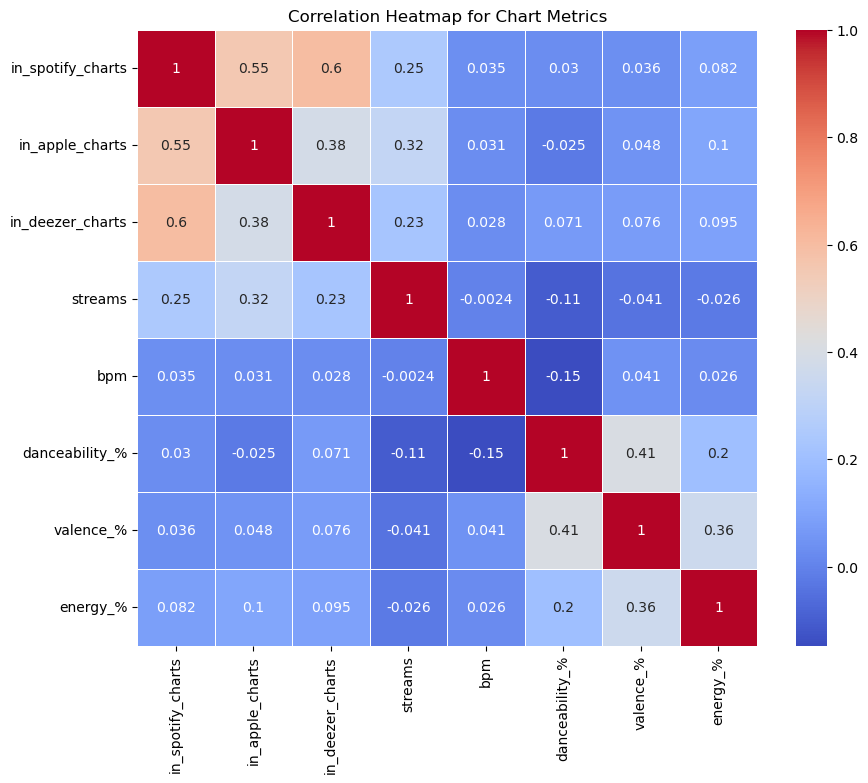

In [8]:
# Examine how the presence and rank on charts correlate with song characteristics
chart_metrics = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']]

# Calculate correlations between chart metrics and song characteristics
chart_correlations = chart_metrics.corr()

# Print the correlation matrix for chart metrics
print("Correlation Matrix for Chart Metrics:")
print(chart_correlations)

# Visualize the correlations using a heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(chart_correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Chart Metrics")
plt.show()


**Artist and Collaboration Analysis**

In [9]:
# Group the data by 'artist(s)_name' and count the number of songs for each artist/group
artist_song_counts = df['artist(s)_name'].value_counts()

# Display the artists/groups with the most songs
most_songs = artist_song_counts.head(10)  # Adjust the number as needed
print("Artists/Groups with the Most Songs:")
print(most_songs)


Artists/Groups with the Most Songs:
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64


How does ***collaboration*** (measured by artist_count) affect song attributes and popularity?

In [10]:
# Basic statistics for artist_count
print(df['artist_count'].describe(), end="\n\n")

# Basic statistics for a song attribute (e.g., BPM)
print(df['bpm'].describe(), end="\n\n")


count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64



In [11]:
# Correlation between artist_count and BPM
correlation = df['artist_count'].corr(df['bpm'])
print("Correlation between artist_count and BPM:", correlation)


Correlation between artist_count and BPM: -0.03837538512333286


There's a negative correlation between the number of artist and the BPM, which indicates a weak relationship between artist_count and BPM. As the number of artists increases, BPM tends to decrease slightly, but the effect is not significant.

In [12]:
bpm_streams_corr = df['bpm'].corr(df['streams'])
print("Correlation between artist_count and streams:", bpm_streams_corr)

Correlation between artist_count and streams: -0.002437908138271807


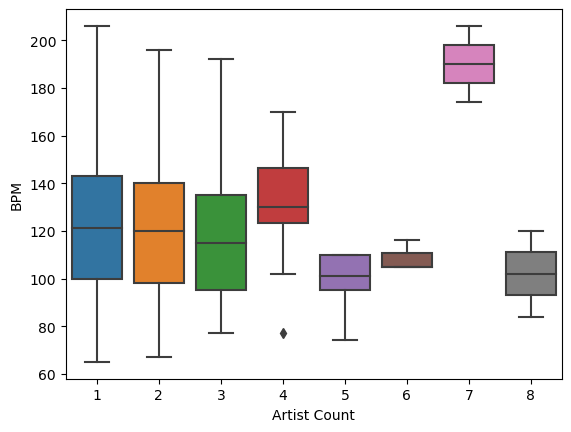

In [13]:
# Box plots to visualize the distribution of attributes by artist_count
sns.boxplot(x='artist_count', y='bpm', data=df)
plt.xlabel('Artist Count')
plt.ylabel('BPM')
plt.show()

In [14]:
# Grouped analysis of song attributes by artist_count
grouped = df.groupby('artist_count').agg({'bpm': 'mean', 'danceability_%': 'mean', 'valence_%': 'mean', 'streams': 'sum'})
print(grouped)


                     bpm  danceability_%  valence_%       streams
artist_count                                                     
1             123.597956       64.172061  49.245315  3.329720e+11
2             121.767717       71.145669  53.933071  1.174701e+11
3             116.423529       71.294118  56.317647  3.241408e+10
4             133.600000       74.733333  55.333333  4.591594e+09
5              98.000000       77.800000  62.000000  7.240410e+08
6             108.666667       83.333333  66.666667  2.623994e+08
7             190.000000       62.500000  78.500000  6.781201e+08
8             102.000000       68.500000  62.000000  3.464423e+08


In [15]:
#Analyze how artist_count relates to song popularity (e.g., streams). 
# Popularity analysis by artist_count



popularity_stats = df.groupby('artist_count')['streams'].agg(['mean', 'median'])
print(popularity_stats)


                      mean       median
artist_count                           
1             5.682117e+08  333619963.0
2             4.624808e+08  249408543.5
3             3.813421e+08  231332117.0
4             3.061062e+08  159240673.0
5             1.448082e+08  133753727.0
6             8.746645e+07  120847157.0
7             3.390601e+08  339060067.5
8             1.732212e+08  173221173.5


As we move from songs with fewer artists (lower artist_count) to songs with more artists (higher artist_count), there are noticeable trends in popularity:

On average, songs with 1 or 2 artists tend to have the highest mean and median stream counts. This suggests that songs with fewer artists are, on average, more popular in terms of streams.

As the number of artists increases beyond 2, the mean and median stream counts tend to decrease. This indicates that songs with more artists are, on average, less popular in terms of streams.

**Liveness and Speechiness**

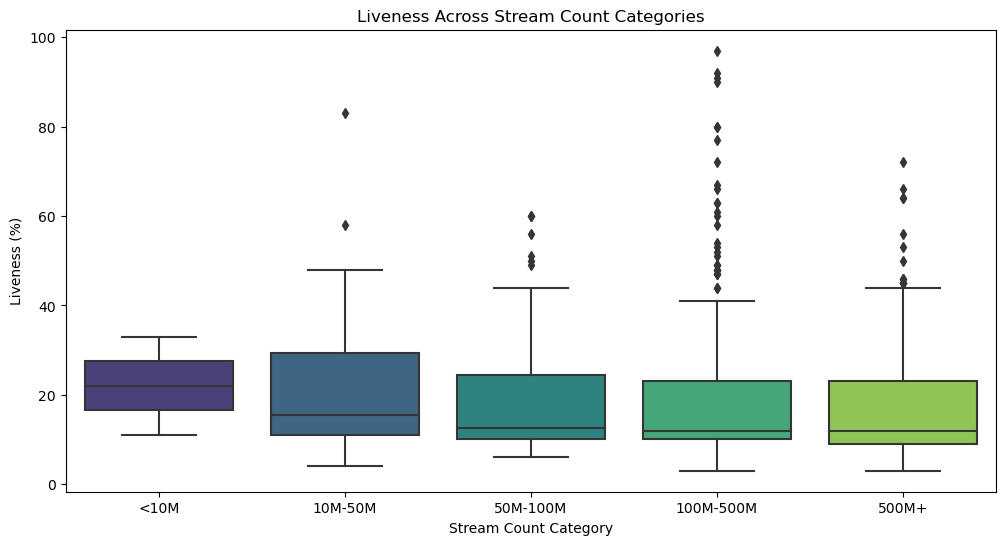

In [16]:
# Define bins for stream counts
stream_bins = [0, 10000000, 50000000, 100000000, 500000000, np.inf]  # Example bins

# Create labels for the bins
stream_labels = ['<10M', '10M-50M', '50M-100M', '100M-500M','500M+']

# Assign each song to a stream count category based on the bins
df['stream_category'] = pd.cut(df['streams'], bins=stream_bins, labels=stream_labels)

# Box plot to visualize liveness across stream count categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stream_category', y='liveness_%', palette='viridis', order=stream_labels)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.title('Liveness Across Stream Count Categories')
plt.xlabel('Stream Count Category')
plt.ylabel('Liveness (%)')
plt.show()

In [17]:
# Correlation between liveness and streams
liveness_streams_corr = df['liveness_%'].corr(df['streams'])
print(f"Correlation between Liveness (%) and Streams: {liveness_streams_corr:.2f}")


Correlation between Liveness (%) and Streams: -0.05


Trends in Speechiness

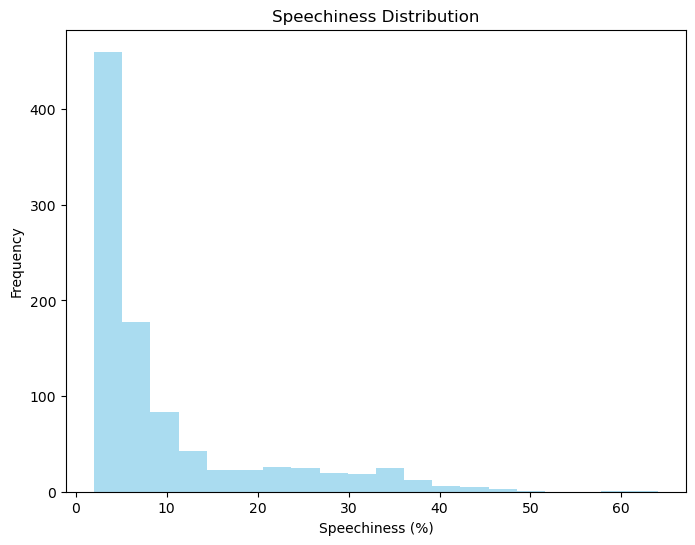

In [18]:
# Histogram for speechiness
plt.figure(figsize=(8, 6))
plt.hist(df['speechiness_%'], bins=20, color='skyblue', alpha=0.7)
plt.title('Speechiness Distribution')
plt.xlabel('Speechiness (%)')
plt.ylabel('Frequency')
plt.show()


In [19]:
from scipy.stats import describe

liveness_summary = describe(df['liveness_%'])
print(liveness_summary)

DescribeResult(nobs=953, minmax=(3, 97), mean=18.213011542497377, variance=187.99764564797587, skewness=2.1009665081534723, kurtosis=5.678169033903242)


In [20]:
from scipy.stats import norm

# Fit a normal distribution to liveness data
loc, scale = norm.fit(df['liveness_%'])
print(f"Estimated Mean: {loc}, Estimated Standard Deviation: {scale}")

Estimated Mean: 18.213011542497377, Estimated Standard Deviation: 13.704027741693038


**Artist's Discography**

Total Songs: 953
Years Spanned: 93 years


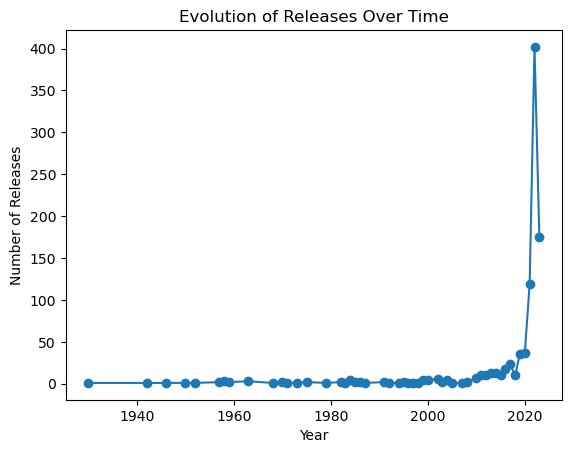

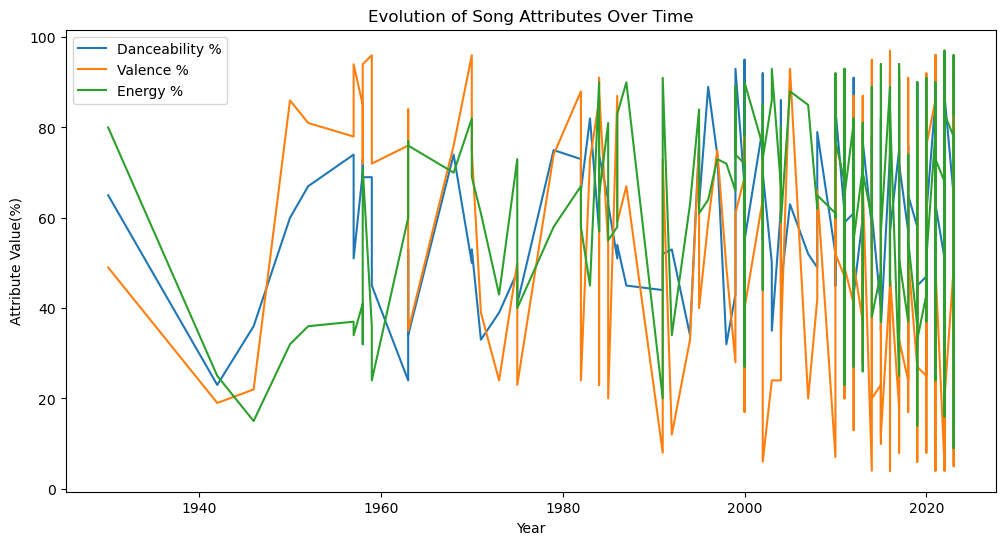

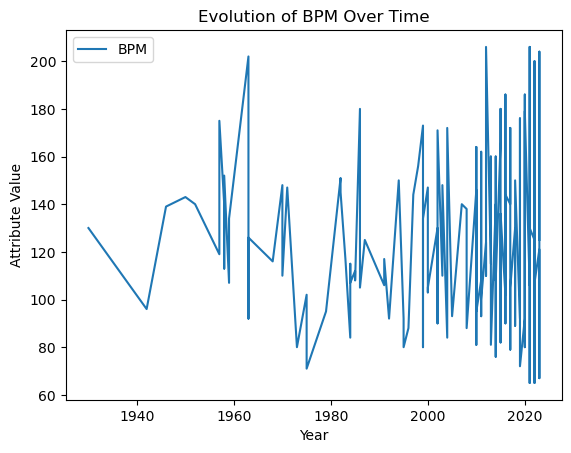

In [21]:

total_songs = len(df)
years_spanned = df['released_year'].max() - df['released_year'].min()

print(f"Total Songs: {total_songs}")
print(f"Years Spanned: {years_spanned} years")


releases_per_year = df.groupby('released_year')['track_name'].count()
plt.plot(releases_per_year.index, releases_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Evolution of Releases Over Time')
plt.show()


df.sort_values(by=["released_year"], ascending=True, inplace=True)
plt.figure(figsize=(12, 6))

plt.plot(df['released_year'], df['danceability_%'], label='Danceability %')
plt.plot(df['released_year'], df['valence_%'], label='Valence %')
plt.plot(df['released_year'], df['energy_%'], label='Energy %')
plt.xlabel('Year')
plt.ylabel('Attribute Value(%)')
plt.title('Evolution of Song Attributes Over Time')
plt.legend()
plt.show()


plt.plot(df['released_year'], df['bpm'], label='BPM')
plt.xlabel('Year')
plt.ylabel('Attribute Value')
plt.title('Evolution of BPM Over Time')
plt.legend()
plt.show()